In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:
img = image.load_img("basedata/training/happy/10.JPG")

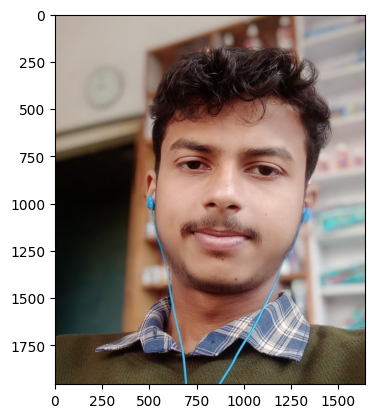

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("basedata/training/happy/10.JPG").shape

(1957, 1643, 3)

In [6]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [7]:
train_dataset = train.flow_from_directory('basedata/training/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 123 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                  ])

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
            metrics = ['accuracy'])

In [15]:
model_fit = model.fit(train_dataset, 
                     steps_per_epoch = 8,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
8/8 [==============================] - 5s 553ms/step - loss: 1.6080 - accuracy: 0.7917
Epoch 2/30
8/8 [==============================] - 4s 508ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - 5s 572ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - 4s 485ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/30
8/8 [==============================] - 4s 508ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6/30
8/8 [==============================] - 4s 491ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/30
8/8 [==============================] - 4s 514ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/30
8/8 [==============================] - 4s 529ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/30
8/8 [==============================] - 4s 483ms/step - loss: 5.8956e-05 - accuracy: 1.0000
Epoch 10/30
8/8 [==============================] - 4s 482ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11/30
8/8

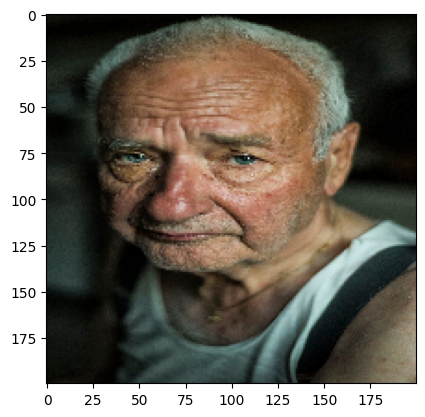

1/1 [==============================] - 0s 121ms/step
You're not happy


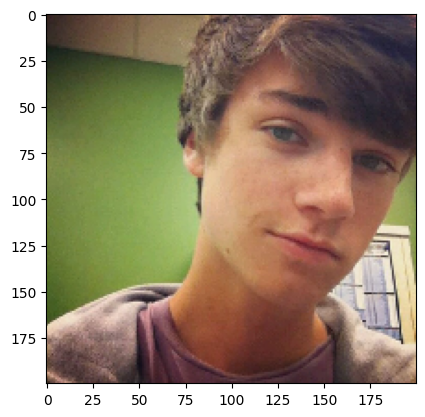

1/1 [==============================] - 0s 82ms/step
You're happy


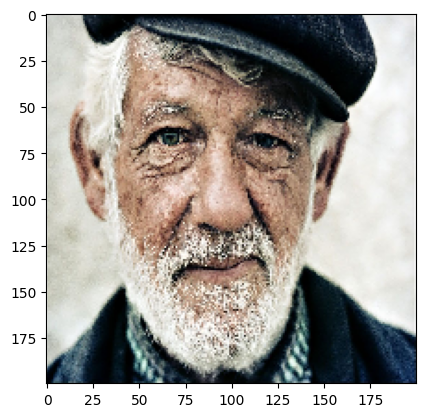

1/1 [==============================] - 0s 100ms/step
You're happy


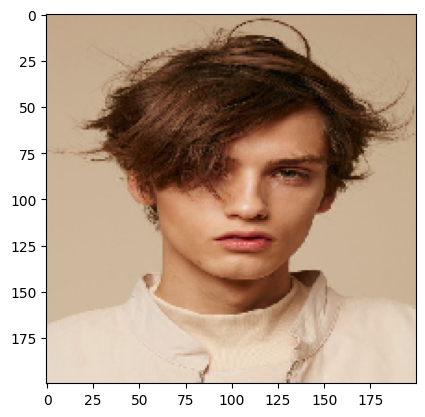

1/1 [==============================] - 0s 85ms/step
You're happy


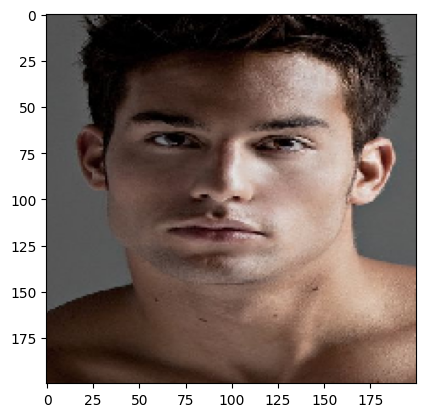

1/1 [==============================] - 0s 113ms/step
You're happy


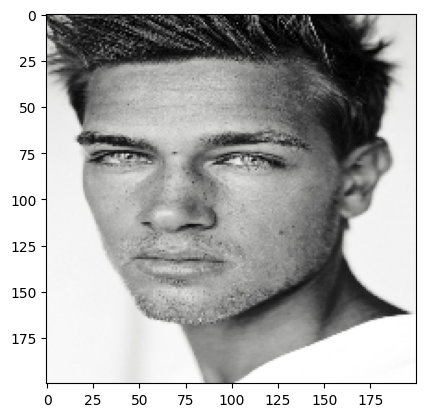

1/1 [==============================] - 0s 76ms/step
You're not happy


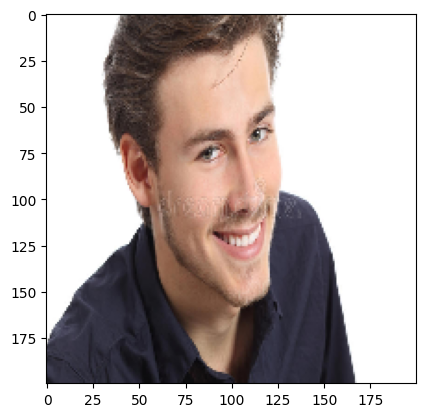

1/1 [==============================] - 0s 58ms/step
You're not happy


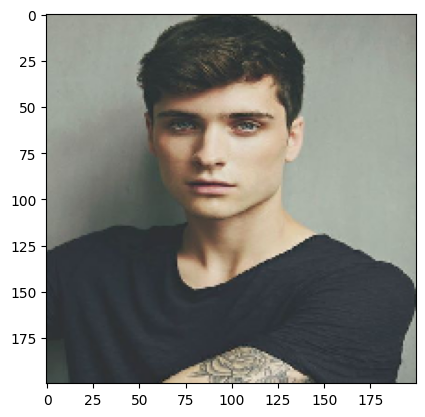

1/1 [==============================] - 0s 79ms/step
You're happy


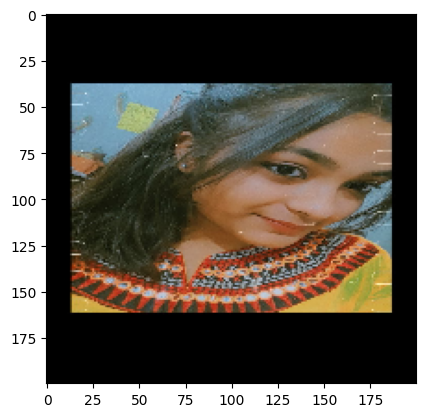

1/1 [==============================] - 0s 65ms/step
You're not happy


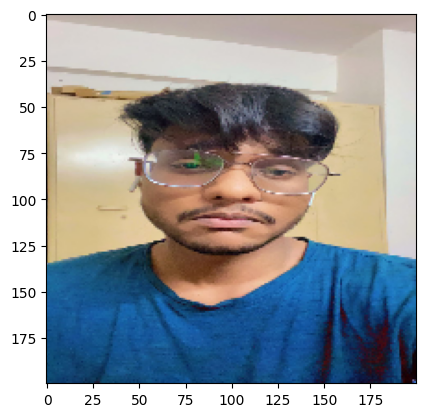

1/1 [==============================] - 0s 51ms/step
You're happy


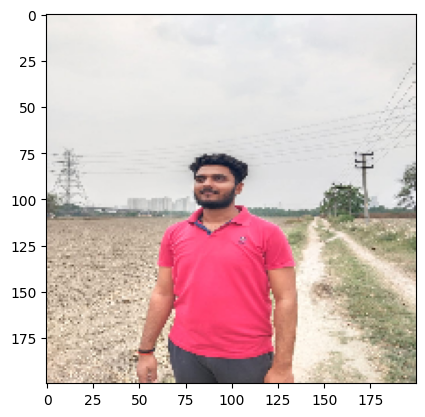

1/1 [==============================] - 0s 79ms/step
You're happy


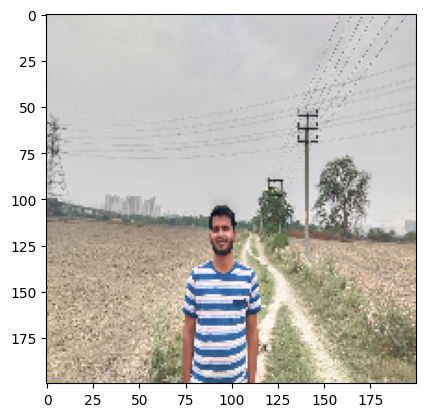

1/1 [==============================] - 0s 66ms/step
You're happy


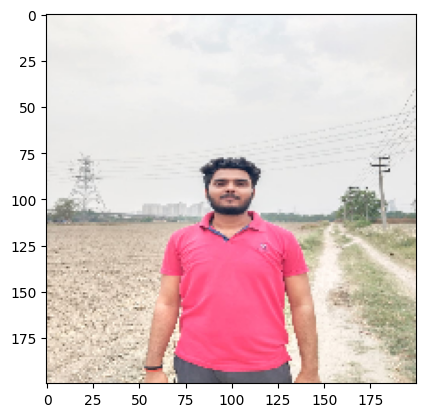

1/1 [==============================] - 0s 45ms/step
You're happy


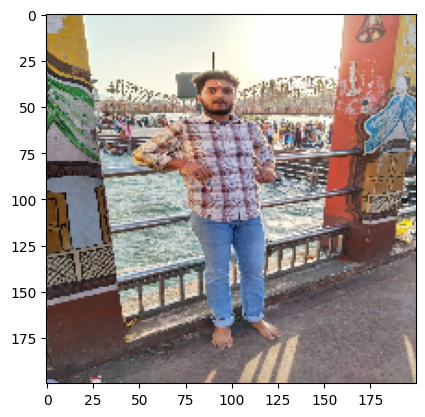

1/1 [==============================] - 0s 50ms/step
You're not happy


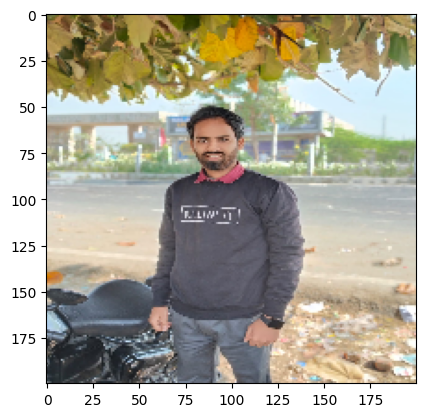

1/1 [==============================] - 0s 65ms/step
You're happy


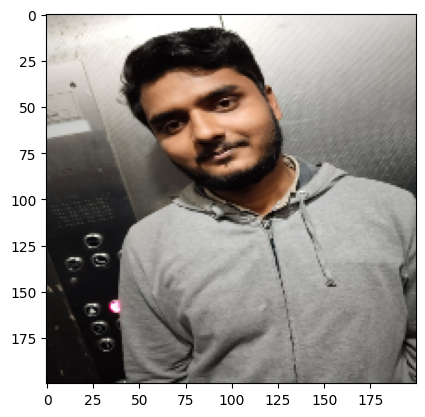

1/1 [==============================] - 0s 80ms/step
You're happy


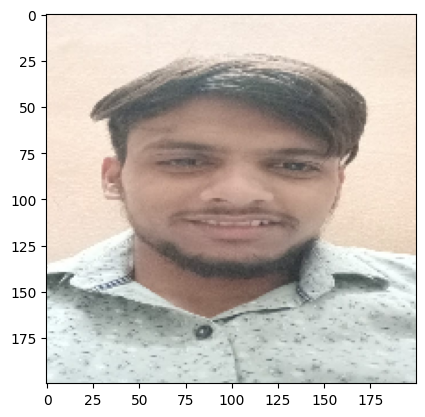

1/1 [==============================] - 0s 68ms/step
You're happy


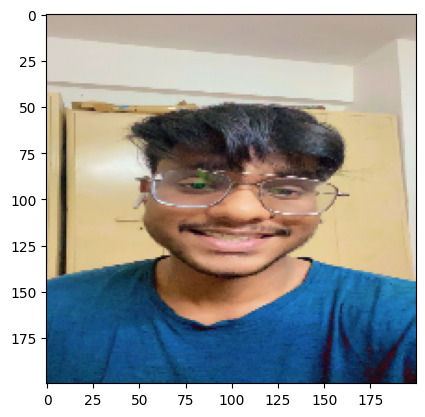

1/1 [==============================] - 0s 54ms/step
You're not happy


In [16]:
dir_path = 'basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("You're happy")
    else:
        print("You're not happy")